# TUGAS BESAR PROBABILITAS DAN STATISTIKA

## NAMA : FILBERT FELIM
## NIM     : 18221097

In [758]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
from math import sqrt

In [759]:
df = pd.read_excel('18221097.xlsx')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [760]:
df

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Wanita,19,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Jakarta,NaN,Ya,Akses media sosial,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,Saldo eMoney/ eWallet berkurang tanpa melakuka...
1,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,700%,Sama saja,NaN,NaN,...,Transfer via ATM,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
2,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,1000%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,NaN,NaN
3,Pria,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
4,Pria,20,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Medan,800%,Sama saja,NaN,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Wanita,28,D3,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Jakarta,NaN,Ya,Mengikuti kelas online,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,Wanita,58,S2,Ibu Rumah Tangga,< Rp 2 juta,Jakarta,200%,Sama saja,NaN,NaN,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
292,Wanita,21,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
293,Wanita,21,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Tangerang,1200%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,Jumlah barang yang diterima kurang,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


### Nomor 1

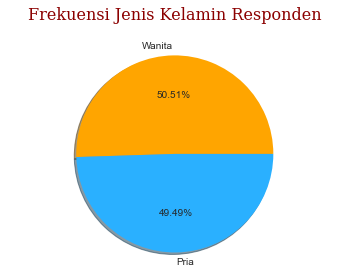

In [761]:
# menghitung frekuensi dari jenis kelamin
groupby_jenis_kelamin = pd.DataFrame(df["Jenis Kelamin"].value_counts())
colors = ("orange", "#2ab0ff") 

# membuat pie plot
fig1, ax1 = plt.subplots()
ax1.pie(groupby_jenis_kelamin["Jenis Kelamin"],colors = colors,labels=["Wanita","Pria"],shadow=True,autopct='%1.2f%%')
plt.title('Frekuensi Jenis Kelamin Responden\n',fontdict=font) 
ax1.axis('equal')
plt.show()

### Nomor 2

In [762]:
# menghitung proporsi jenis kelamin
groupby_jenis_kelamin_percentage = pd.DataFrame(df["Jenis Kelamin"].value_counts(normalize=True))

# mengubah nama kolom dari data dan menggabungkan data frekuensi dan proporsi
groupby_jenis_kelamin.rename(columns = {'Jenis Kelamin':'Frekuensi'}, inplace = True)
groupby_jenis_kelamin_percentage.rename(columns = {'Jenis Kelamin':'Proporsi (%)'}, inplace = True)

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_jenis_kelamin_percentage.iloc[:,0])):
    groupby_jenis_kelamin_percentage.iloc[:,0][i] = groupby_jenis_kelamin_percentage.iloc[:,0][i] * 100

# menggabungkan data frekuensi dan proporsi dalam 1 tabel
nomor2 = [groupby_jenis_kelamin,groupby_jenis_kelamin_percentage]
nomor2 = pd.concat(nomor2,axis=1)
nomor2.rename_axis('Jenis Kelamin',axis='columns',inplace=True)

# menampilkan tabel
display(nomor2)

Jenis Kelamin,Frekuensi,Proporsi (%)
Wanita,149,50.508475
Pria,146,49.491525


### Nomor 3

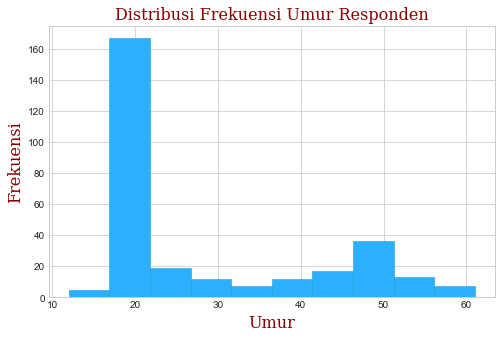

In [763]:
# data umur
umur = df.iloc[:,1:2]

# plot histogram umur
plt.figure(figsize=(8,5))
plt.style.use('seaborn-whitegrid')
plt.hist(umur, bins=10, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribusi Frekuensi Umur Responden',fontdict=font) 
plt.xlabel('Umur',fontdict=font) 
plt.ylabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 4

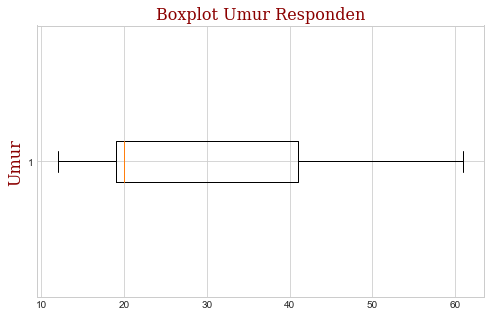

In [764]:
#plot boxplot umur
plt.figure(figsize=(8,5))
plt.style.use('seaborn-whitegrid')
plt.boxplot(umur,vert = False)
plt.title('Boxplot Umur Responden',fontdict=font) 
plt.ylabel('Umur',fontdict=font)
plt.show()

### Nomor 5

In [765]:
# mean dari umur dan mengubah ke bentuk DataFrame
mean_umur = np.mean(umur)
mean_umur = pd.DataFrame(mean_umur)
mean_umur.columns = ['Usia']
mean_umur = mean_umur.rename(index={'Usia': 'Mean'})

# menghitung q1 dan q3
q1_umur, q3_umur= np.percentile(umur,[25,75])
q1_umur = [q1_umur]
q3_umur = [q3_umur]
q1_umur

# Q1 dari umur dan mengubah ke bentuk DataFrame
q1_umur = pd.DataFrame(q1_umur, index = ['Q1'])
q1_umur.columns = ['Usia']

# Q2 / Median dari umur dan mengubah ke bentuk DataFrame
q2_umur = np.median(umur)
q2_umur = [q2_umur]
q2_umur = pd.DataFrame(q2_umur, index = ['Q2 / Median'])
q2_umur.columns = ['Usia']

# Q3 dari umur dan mengubah ke bentuk DataFrame
q3_umur = pd.DataFrame(q3_umur, index = ['Q1'])
q3_umur.columns = ['Usia']

# Min dari umur dan mengubah ke bentuk DataFrame
min_umur = np.min(umur)
min_umur = pd.DataFrame(min_umur)
min_umur.columns = ['Usia']
min_umur = min_umur.rename(index={'Usia': 'Min'})

# Max dari umur dan mengubah ke bentuk DataFrame
max_umur = np.max(umur)
max_umur = pd.DataFrame(max_umur)
max_umur.columns = ['Usia']
max_umur = max_umur.rename(index={'Usia': 'Max'})

# menggabungkan data dalam satu tabel
metadata = [mean_umur,q1_umur,q2_umur,q3_umur,min_umur,max_umur]
metadata = pd.concat(metadata)
display(metadata)

,Usia
Mean,28.532203
Q1,19.000000
Q2 / Median,20.000000
Q1,41.000000
Min,12.000000
Max,61.000000


### Nomor 6

In [766]:
# menghitung IQR ( Interquartile range ) dan batas atas dan bawah outlier
iqr = q3_umur.iloc[0][0] - q1_umur.iloc[0][0]
LB_umur = q1_umur.iloc[0][0] - 1.5 * iqr
UB_umur = q3_umur.iloc[0][0] + 1.5 * iqr

outlier_bawah = []
outlier_atas = []

# mengecek data umur satu per satu apakah outlier atau tidak
for i in range(295):
    if umur.iloc[i][0] < LB_umur:
        outlier_bawah.append(umur.iloc[i][0])
    if umur.iloc[i][0] > UB_umur:
        outlier_atas.append(umur.iloc[i][0])

# mencetak outlier yang ada
print(outlier_bawah)
print(outlier_atas)

# TIDAK ADA OUTLIER PADA DATA UMUR RESPONDEN

[]
[]


### Jawaban nomor  6 :
#### TIDAK ADA OUTLIER PADA DATA UMUR RESPONDEN

### Nomor 7

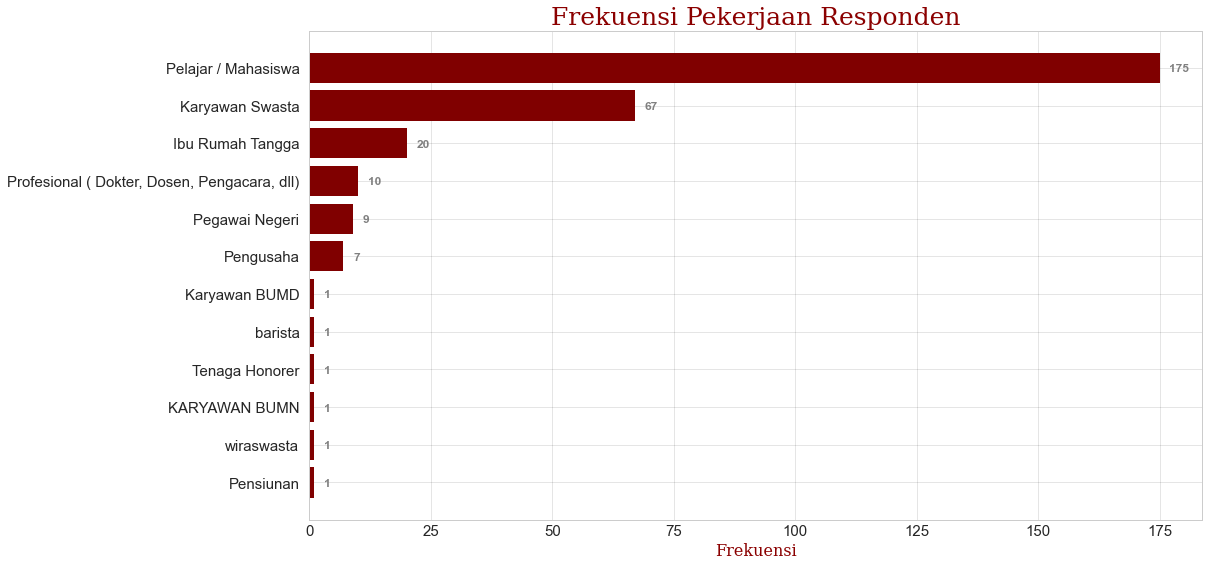

In [767]:
# menghitung frekuensi per profesi responden
groupby_pekerjaan = pd.DataFrame(df["Pekerjaan"].value_counts())
groupby_pekerjaan['Nama Pekerjaan'] = groupby_pekerjaan.index
groupby_pekerjaan.reset_index(drop=True, inplace=True)

# mengubah data ke list
nama_pekerjaan = list(groupby_pekerjaan["Nama Pekerjaan"])
frek_pekerjaan = list(groupby_pekerjaan["Pekerjaan"])

# membuat bar plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(nama_pekerjaan,frek_pekerjaan,color = 'maroon')
ax.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
plt.setp(ax.get_xticklabels(),fontsize=15)
plt.setp(ax.get_yticklabels(),fontsize=15)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
for i in ax.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax.set_title('Frekuensi Pekerjaan Responden',fontdict=font,fontsize=25)
ax.set_xlabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 8

In [768]:
# menghitung proporsi jenis pekerjaan
groupby_pekerjaan_percentage = pd.DataFrame(df["Pekerjaan"].value_counts(normalize=True))
groupby_pekerjaan = pd.DataFrame(df["Pekerjaan"].value_counts())
groupby_pekerjaan.rename(columns = {'Pekerjaan':'Frekuensi'}, inplace = True)
groupby_pekerjaan_percentage.rename(columns = {'Pekerjaan':'Proporsi (%)'}, inplace = True)

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_pekerjaan_percentage.iloc[:,0])):
    groupby_pekerjaan_percentage.iloc[:,0][i] = groupby_pekerjaan_percentage.iloc[:,0][i] * 100

# menggabungkan data frekuensi dan proporsi jenis pekerjaan menjadi 1 tabel
nomor8 = [groupby_pekerjaan,groupby_pekerjaan_percentage]
nomor8 = pd.concat(nomor8,axis=1)
nomor8.rename_axis('Pekerjaan',axis='columns',inplace=True)
display(nomor8)

Pekerjaan,Frekuensi,Proporsi (%)
Pelajar / Mahasiswa,175,59.523810
Karyawan Swasta,67,22.789116
Ibu Rumah Tangga,20,6.802721
"Profesional ( Dokter, Dosen, Pengacara, dll)",10,3.401361
Pegawai Negeri,9,3.061224
Pengusaha,7,2.380952
Karyawan BUMD,1,0.340136
barista,1,0.340136
Tenaga Honorer,1,0.340136
KARYAWAN BUMN,1,0.340136


### Nomor 9

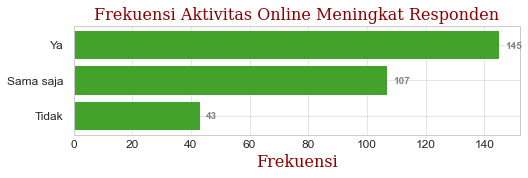

In [769]:
# menghitung frekuensi aktivitas online meningkat responden
groupby_aktivitas = pd.DataFrame(df["Aktivitas Online Meningkat"].value_counts())
groupby_aktivitas['Jenis Aktivitas Online Meningkat'] = groupby_aktivitas.index
groupby_aktivitas.reset_index(drop=True, inplace=True)

# mengubah data ke list
jenis_aktivitas = list(groupby_aktivitas["Jenis Aktivitas Online Meningkat"])
frek_aktivitas = list(groupby_aktivitas["Aktivitas Online Meningkat"])

# membuat bar plot
fig2, ax2 = plt.subplots(figsize =(8, 2))
ax2.barh(jenis_aktivitas,frek_aktivitas,color = '#43a22c')
ax2.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax2.invert_yaxis()
plt.setp(ax2.get_xticklabels(),fontsize=12)
plt.setp(ax2.get_yticklabels(),fontsize=12)
ax2.xaxis.set_tick_params(pad = 5)
ax2.yaxis.set_tick_params(pad = 10)
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
for i in ax2.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax2.set_title('Frekuensi Aktivitas Online Meningkat Responden',fontdict = font)
ax2.set_xlabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 10

In [770]:
# menghitung proporsi aktivitas meningkat
groupby_aktivitas_percentage = pd.DataFrame(df["Aktivitas Online Meningkat"].value_counts(normalize=True))
groupby_aktivitas = pd.DataFrame(df["Aktivitas Online Meningkat"].value_counts())
groupby_aktivitas.rename(columns = {'Aktivitas Online Meningkat':'Frekuensi'}, inplace = True)
groupby_aktivitas_percentage.rename(columns = {'Aktivitas Online Meningkat':'Proporsi (%)'}, inplace = True)

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_aktivitas_percentage.iloc[:,0])):
    groupby_aktivitas_percentage.iloc[:,0][i] = groupby_aktivitas_percentage.iloc[:,0][i] * 100

# menggabungkan data frekuensi dan proporsi aktivitas meningkat menjadi 1 tabel
nomor10 = [groupby_aktivitas,groupby_aktivitas_percentage]
nomor10 = pd.concat(nomor10,axis=1)
nomor10.rename_axis('Aktivitas Online Meningkat',axis='columns',inplace=True)
display(nomor10)

Aktivitas Online Meningkat,Frekuensi,Proporsi (%)
Ya,145,49.152542
Sama saja,107,36.271186
Tidak,43,14.576271


### Nomor 11

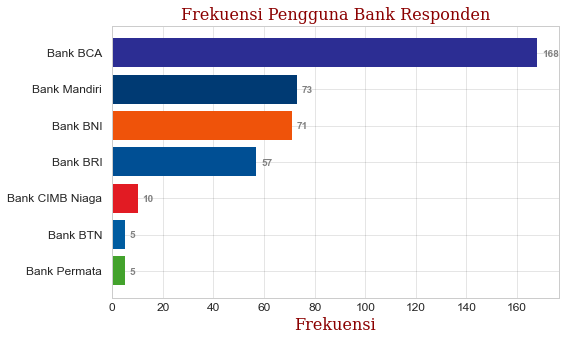

In [771]:
# menghitung banyak pengguna tiap bank
bank_1 = pd.DataFrame(df["bank_1"].value_counts())
bank_2 = pd.DataFrame(df["bank_2"].value_counts())
bank_3 = pd.DataFrame(df["bank_3"].value_counts())
bank_4 = pd.DataFrame(df["bank_4"].value_counts())
bank_5 = pd.DataFrame(df["bank_5"].value_counts())
bank_6 = pd.DataFrame(df["bank_6"].value_counts())
bank_7 = pd.DataFrame(df["bank_7"].value_counts())

# menjumlahkan total banyak pengguna semua bank
total_bank = bank_1.iloc[0][0] + bank_2.iloc[0][0] + bank_3.iloc[0][0] + bank_4.iloc[0][0] + bank_5.iloc[0][0] + bank_6.iloc[0][0] + bank_7.iloc[0][0]

# membuat data nama bank dan frekuensi penggunanya ke dalam list
nama_bank = [bank_1.index[0],bank_2.index[0],bank_3.index[0],bank_4.index[0],bank_5.index[0],bank_6.index[0],bank_7.index[0]]
frek_bank = [bank_1.iloc[0][0],bank_2.iloc[0][0], bank_3.iloc[0][0] , bank_4.iloc[0][0] , bank_5.iloc[0][0] , bank_6.iloc[0][0] ,bank_7.iloc[0][0]]

# mengubah list menjadi dataframe
data_bank = {'Bank' : nama_bank, 'Frekuensi Pengguna' : frek_bank}
df_bank = pd.DataFrame(data = data_bank)
df_bank = df_bank.sort_values("Frekuensi Pengguna",ascending=False)

# mengubah data ke list lagi ( terurut menurun berdasarkan frekuensi )
nama_bank = list(df_bank["Bank"])
frek_bank = list(df_bank["Frekuensi Pengguna"])

# membuat bar plot
fig3, ax3 = plt.subplots(figsize =(8, 5))
ax3.barh(nama_bank,frek_bank,color = ['#2c2d93','#003a73','#ef530a','#004f94','#e21b23','#005ca0','#43a22c'])
ax3.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax3.invert_yaxis()
plt.setp(ax3.get_xticklabels(),fontsize=12)
plt.setp(ax3.get_yticklabels(),fontsize=12)
ax3.xaxis.set_tick_params(pad = 5)
ax3.yaxis.set_tick_params(pad = 10)
ax3.xaxis.set_ticks_position('none')
ax3.yaxis.set_ticks_position('none')
for i in ax3.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax3.set_title('Frekuensi Pengguna Bank Responden',fontdict=font)
ax3.set_xlabel('Frekuensi',fontdict=font)
plt.show()


### Nomor 12

In [772]:
# inisialisasi ulang nama bank dan frekuensi pengguna untuk kepentingan menghitung proporsi
nama_bank = [bank_1.index[0],bank_2.index[0],bank_3.index[0],bank_4.index[0],bank_5.index[0],bank_6.index[0],bank_7.index[0]]
frek_bank = [bank_1.iloc[0][0],bank_2.iloc[0][0], bank_3.iloc[0][0] , bank_4.iloc[0][0] , bank_5.iloc[0][0] , bank_6.iloc[0][0] ,bank_7.iloc[0][0]]

# menghitung proporsi tiap E-money dan dimasukkan ke dalam list
prop_bank = []
for x in frek_bank:
    prop_bank.append(x / total_bank * 100)
    
# membuat DataFrame berisi data yang lengkap untuk frekuensi dan proporsi pengguna bank
data_bank = {'Bank' : nama_bank, 'Frekuensi' : frek_bank, 'Proporsi (%)' : prop_bank}
df_bank = pd.DataFrame(data = data_bank)

# diurutkan menurun berdasarkan frekuensi pengguna
df_bank = df_bank.sort_values("Frekuensi",ascending=False)

# memasukkan nama bank menjadi index
df_bank = df_bank.set_index('Bank')

display(df_bank)

,Frekuensi,Proporsi (%)
Bank,,
Bank BCA,168,43.187661
Bank Mandiri,73,18.766067
Bank BNI,71,18.251928
Bank BRI,57,14.652956
Bank CIMB Niaga,10,2.570694
Bank BTN,5,1.285347
Bank Permata,5,1.285347


### Nomor 13

In [773]:
# inisialisasi variabel yang akan dipakai
prop_BCA = prop_bank[2] / 100 # proporsi BCA
n = total_bank # banyak data
alpha2 = 0.05 / 2 # alpha / 2
z_alpha2 = stats.norm.ppf(1-alpha2) # z alpha/2
LB = prop_BCA-z_alpha2*(math.sqrt((prop_BCA*(1-prop_BCA)/n))) # LOWER BOUND
UB = prop_BCA+z_alpha2*math.sqrt((prop_BCA*(1-prop_BCA)/n)) # UPPER BOUND
print("Confidence Interval proporsi penggguna Bank BCA: ")
print(f"{LB:.5f} < Proporsi BCA < {UB:.5f}")

Confidence Interval proporsi penggguna Bank BCA: 
0.38265 < Proporsi BCA < 0.48110


### Nomor 14

In [774]:
alpha = 0.05
p0 = 0.5
phat = prop_bank[2] / 100
z = ((n*phat)-(n*p0))/(math.sqrt(n*p0*(1-p0)))
z_alpha2 = stats.norm.ppf(1-alpha / 2)
z_alpha2
print("Critical Region : ")
print(f"z < {-z_alpha2:.5f} | z > {z_alpha2:.5f}")
print(f"z = {z:.5f} -> didalam critical region")
print("H0 berhasil ditolak")
pvalue = 2*(1 - stats.norm.cdf(abs(z)))
print(f"P-value : {pvalue:.5f}")

Critical Region : 
z < -1.95996 | z > 1.95996
z = -2.68721 -> didalam critical region
H0 berhasil ditolak
P-value : 0.00721


### Nomor 15

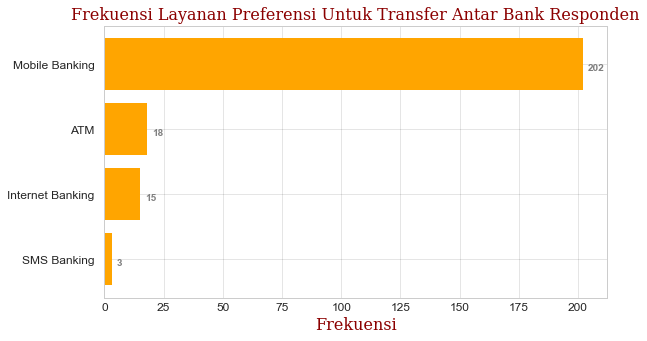

In [775]:
# mengambil data preferensi channel
data15 = df.iloc[:,30:31]

# menghitung frekuensi aktivitas online meningkat responden
groupby_preferensichannel = pd.DataFrame(data15.value_counts())
groupby_preferensichannel["Layanan Preferensi untuk transfer antar bank"] = ["Mobile Banking","ATM","Internet Banking","SMS Banking"]
groupby_preferensichannel.reset_index(inplace =True, drop= True)
groupby_preferensichannel.columns = ["Frekuensi","Layanan Preferensi untuk transfer antar bank"]

# mengubah data ke list
jenis_preferensichannel = list(groupby_preferensichannel["Layanan Preferensi untuk transfer antar bank"])
frek_preferensichannel = list(groupby_preferensichannel["Frekuensi"])

# membuat bar plot
fig3, ax3 = plt.subplots(figsize =(9, 5))
ax3.barh(jenis_preferensichannel,frek_preferensichannel,color = 'orange')
ax3.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax3.invert_yaxis()
plt.setp(ax3.get_xticklabels(),fontsize=12)
plt.setp(ax3.get_yticklabels(),fontsize=12)
ax3.xaxis.set_tick_params(pad = 5)
ax3.yaxis.set_tick_params(pad = 10)
ax3.xaxis.set_ticks_position('none')
ax3.yaxis.set_ticks_position('none')
for i in ax3.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax3.set_title('Frekuensi Layanan Preferensi Untuk Transfer Antar Bank Responden',fontdict=font)
ax3.set_xlabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 16

In [776]:
# menghitung proporsi preferensi layanan
groupby_preferensichannel_percentage = pd.DataFrame(data15.value_counts(normalize=True))
groupby_preferensichannel = pd.DataFrame(data15.value_counts())
groupby_preferensichannel.columns = ['Frekuensi']
groupby_preferensichannel_percentage.columns = ['Proporsi (%)']

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_preferensichannel_percentage.iloc[:,0])):
    groupby_preferensichannel_percentage.iloc[:,0][i] = groupby_preferensichannel_percentage.iloc[:,0][i] * 100

# menggabungkan data frekuensi dan proporsi preferensi layanan menjadi 1 tabel
nomor16 = [groupby_preferensichannel,groupby_preferensichannel_percentage]
nomor16 = pd.concat(nomor16,axis=1)
nomor16 = nomor16.rename_axis(None)
nomor16.rename_axis('Layanan preferensi untuk transfer antar bank',axis='columns',inplace=True)
display(nomor16)

Layanan preferensi untuk transfer antar bank,Frekuensi,Proporsi (%)
Mobile Banking,202,84.873950
ATM,18,7.563025
Internet Banking,15,6.302521
SMS Banking,3,1.260504


### Nomor 17

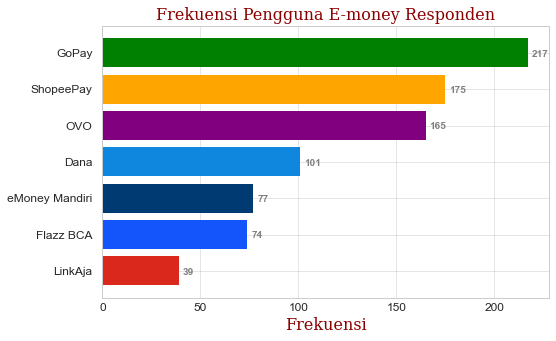

In [777]:
# menghitung banyak pengguna tiap e-money pilihan
emoney_pilihan_1 = pd.DataFrame(df["emoney_pilihan_1"].value_counts())
emoney_pilihan_2 = pd.DataFrame(df["emoney_pilihan_2"].value_counts())
emoney_pilihan_3 = pd.DataFrame(df["emoney_pilihan_3"].value_counts())
emoney_pilihan_4 = pd.DataFrame(df["emoney_pilihan_4"].value_counts())
emoney_pilihan_5 = pd.DataFrame(df["emoney_pilihan_5"].value_counts())
emoney_pilihan_6 = pd.DataFrame(df["emoney_pilihan_6"].value_counts())
emoney_pilihan_7 = pd.DataFrame(df["emoney_pilihan_7"].value_counts())

# menjumlahkan total banyak pengguna semua emoney
total_emoney = emoney_pilihan_1.iloc[0][0] + emoney_pilihan_2.iloc[0][0] + emoney_pilihan_3.iloc[0][0] + emoney_pilihan_4.iloc[0][0] + emoney_pilihan_5.iloc[0][0] + emoney_pilihan_6.iloc[0][0] + emoney_pilihan_7.iloc[0][0]

# membuat data nama emoney dan frekuensi penggunanya ke dalam list
nama_emoney = [emoney_pilihan_1.index[0],emoney_pilihan_2.index[0],emoney_pilihan_3.index[0],emoney_pilihan_4.index[0],emoney_pilihan_5.index[0],emoney_pilihan_6.index[0],emoney_pilihan_7.index[0]]
frek_emoney = [emoney_pilihan_1.iloc[0][0],emoney_pilihan_2.iloc[0][0], emoney_pilihan_3.iloc[0][0] , emoney_pilihan_4.iloc[0][0] , emoney_pilihan_5.iloc[0][0] , emoney_pilihan_6.iloc[0][0] ,emoney_pilihan_7.iloc[0][0]]

# mengubah list menjadi dataframe
data_emoney = {'E-money' : nama_emoney, 'Frekuensi Pengguna' : frek_emoney}
df_emoney = pd.DataFrame(data = data_emoney)
df_emoney = df_emoney.sort_values("Frekuensi Pengguna",ascending=False)

# mengubah data ke list lagi ( terurut menurun berdasarkan frekuensi )
nama_emoney = list(df_emoney["E-money"])
frek_emoney = list(df_emoney["Frekuensi Pengguna"])

# membuat bar plot
fig4, ax4 = plt.subplots(figsize =(8, 5))
ax4.barh(nama_emoney,frek_emoney,color=['green', 'orange', 'purple','#1087df','#003a73','#1454fb','#da281c'])
ax4.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax4.invert_yaxis()
plt.setp(ax4.get_xticklabels(),fontsize=12)
plt.setp(ax4.get_yticklabels(),fontsize=12)
ax4.xaxis.set_tick_params(pad = 5)
ax4.yaxis.set_tick_params(pad = 10)
ax4.xaxis.set_ticks_position('none')
ax4.yaxis.set_ticks_position('none')
for i in ax4.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax4.set_title('Frekuensi Pengguna E-money Responden',fontdict=font)
ax4.set_xlabel('Frekuensi',fontdict=font)
plt.show()


### Nomor 18

In [778]:
# inisialisasi ulang nama E-money dan frekuensi pengguna untuk kepentingan menghitung proporsi
nama_emoney = [emoney_pilihan_1.index[0],emoney_pilihan_2.index[0],emoney_pilihan_3.index[0],emoney_pilihan_4.index[0],emoney_pilihan_5.index[0],emoney_pilihan_6.index[0],emoney_pilihan_7.index[0]]
frek_emoney = [emoney_pilihan_1.iloc[0][0],emoney_pilihan_2.iloc[0][0], emoney_pilihan_3.iloc[0][0] , emoney_pilihan_4.iloc[0][0] , emoney_pilihan_5.iloc[0][0] , emoney_pilihan_6.iloc[0][0] ,emoney_pilihan_7.iloc[0][0]]

# menghitung proporsi tiap E-money dan dimasukkan ke dalam list
prop_emoney = []
for x in frek_emoney:
    prop_emoney.append(x / total_emoney * 100)

# membuat DataFrame berisi data yang lengkap untuk frekuensi dan proporsi pengguna E-money
data_emoney = {'E-money' : nama_emoney, 'Frekuensi' : frek_emoney, 'Proporsi (%)' : prop_emoney}
df_emoney = pd.DataFrame(data = data_emoney)

# diurutkan menurun berdasarkan frekuensi pengguna
df_emoney = df_emoney.sort_values("Frekuensi",ascending=False)

# memasukkan nama bank menjadi index
df_emoney = df_emoney.set_index('E-money')

display(df_emoney)

,Frekuensi,Proporsi (%)
E-money,,
GoPay,217,25.589623
ShopeePay,175,20.636792
OVO,165,19.457547
Dana,101,11.910377
eMoney Mandiri,77,9.080189
Flazz BCA,74,8.726415
LinkAja,39,4.599057


### Nomor 19

In [779]:
n = total_emoney
alpha = 0.05
pgopay = prop_emoney[0] / 100
povo = prop_emoney[2] / 100
pgopay_min_ovo = pgopay - povo
z_alpha2 = stats.norm.ppf(1-alpha / 2)
error =z_alpha2*sqrt(pgopay*(1-pgopay)/n + povo*(1-povo)/n)
LB = pgopay_min_ovo - error
UB = pgopay_min_ovo + error
print("Confidence Interval proporsi pengguna Gopay - proporsi pengguna OVO : ")
print(f"{LB:.5f} < Pgopay - Povo < {UB:.5f}")

Confidence Interval proporsi pengguna Gopay - proporsi pengguna OVO : 
0.02167 < Pgopay - Povo < 0.10098


### Nomor 20

In [780]:
alpha = 0.05
p0 = prop_emoney[2] / 100
phat = prop_emoney[0] / 100
n = total_emoney
z = ((n*phat)-(n*p0))/(math.sqrt(n*p0*(1-p0)))
z_alpha = stats.norm.ppf(1-alpha)
print("Critical Region : ")
print(f"z > {z_alpha:.5f} (z alpha)")
print(f"z = {z:.5f} -> didalam critical region")
print("H0 berhasil ditolak")
pvalue =(1 - stats.norm.cdf(z))
print(f"P-value : {pvalue:.10f}")

Critical Region : 
z > 1.64485 (z alpha)
z = 4.51075 -> didalam critical region
H0 berhasil ditolak
P-value : 0.0000032299


### Nomor 21

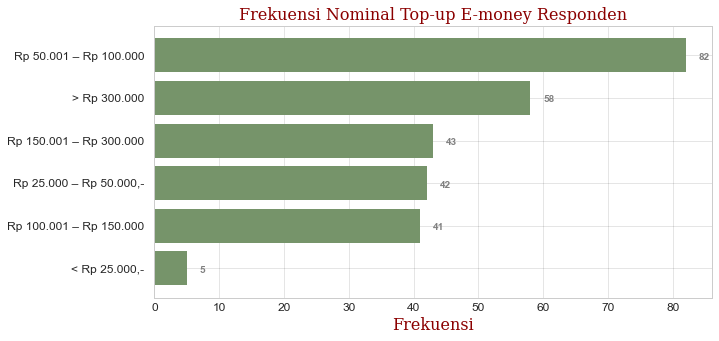

In [781]:
# mengambil data nominal top-up
data21 = df.iloc[:,70:71]

# menghitung frekuensi setiap jenis nominal top-up responden
groupby_nominaltopup = pd.DataFrame(data21.value_counts())
groupby_nominaltopup["Nominal Top-up"] = ["Rp 50.001 – Rp 100.000","> Rp 300.000","Rp 150.001 – Rp 300.000","Rp 25.000 – Rp 50.000,-","Rp 100.001 – Rp 150.000","< Rp 25.000,-"]
groupby_nominaltopup.reset_index(drop=True, inplace=True)
groupby_nominaltopup.columns = ["Frekuensi","Nominal top-up"]

# mengubah data ke list
jenis_nominaltopup = list(groupby_nominaltopup["Nominal top-up"])
frek_nominaltopup = list(groupby_nominaltopup["Frekuensi"])

# membuat bar plot
fig5, ax5 = plt.subplots(figsize =(10, 5))
ax5.barh(jenis_nominaltopup,frek_nominaltopup,color = '#76946a')
ax5.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax5.invert_yaxis()
plt.setp(ax5.get_xticklabels(),fontsize=12)
plt.setp(ax5.get_yticklabels(),fontsize=12)
ax5.xaxis.set_tick_params(pad = 5)
ax5.yaxis.set_tick_params(pad = 10)
ax5.xaxis.set_ticks_position('none')
ax5.yaxis.set_ticks_position('none')
for i in ax5.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax5.set_title('Frekuensi Nominal Top-up E-money Responden',fontdict=font)
ax5.set_xlabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 22

In [782]:
# menghitung proporsi nominal top-up
groupby_nominaltopup_percentage = pd.DataFrame(data21.value_counts(normalize=True))
groupby_nominaltopup = pd.DataFrame(data21.value_counts())
groupby_nominaltopup.columns = ['Frekuensi']
groupby_nominaltopup_percentage.columns = ['Proporsi (%)']

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_nominaltopup_percentage.iloc[:,0])):
    groupby_nominaltopup_percentage.iloc[:,0][i] = groupby_nominaltopup_percentage.iloc[:,0][i] * 100
    
# menggabungkan data frekuensi dan proporsi nominal top-up menjadi 1 tabel
nomor22 = [groupby_nominaltopup,groupby_nominaltopup_percentage]
nomor22 = pd.concat(nomor22,axis=1)
nomor22 = nomor22.rename_axis(None)
nomor22.rename_axis('Nominal Top-up',axis='columns',inplace=True)
display(nomor22)


Nominal Top-up,Frekuensi,Proporsi (%)
Rp 50.001 – Rp 100.000,82,30.258303
> Rp 300.000,58,21.402214
Rp 150.001 – Rp 300.000,43,15.867159
"Rp 25.000 – Rp 50.000,-",42,15.498155
Rp 100.001 – Rp 150.000,41,15.129151
"< Rp 25.000,-",5,1.845018


### Nomor 23

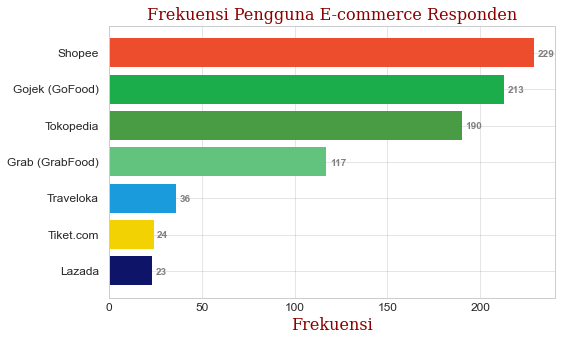

In [783]:
# menghitung banyak pengguna tiap e-money pilihan
ecommerce_pilihan_1 = pd.DataFrame(df["ecommerce_pilihan_1"].value_counts())
ecommerce_pilihan_2 = pd.DataFrame(df["ecommerce_pilihan_2"].value_counts())
ecommerce_pilihan_3 = pd.DataFrame(df["ecommerce_pilihan_3"].value_counts())
ecommerce_pilihan_4 = pd.DataFrame(df["ecommerce_pilihan_4"].value_counts())
ecommerce_pilihan_5 = pd.DataFrame(df["ecommerce_pilihan_5"].value_counts())
ecommerce_pilihan_6 = pd.DataFrame(df["ecommerce_pilihan_6"].value_counts())
ecommerce_pilihan_7 = pd.DataFrame(df["ecommerce_pilihan_7"].value_counts())

# menjumlahkan total banyak pengguna semua e-commerce
total_ecommerce = ecommerce_pilihan_1.iloc[0][0] + ecommerce_pilihan_2.iloc[0][0] + ecommerce_pilihan_3.iloc[0][0] + ecommerce_pilihan_4.iloc[0][0] + ecommerce_pilihan_5.iloc[0][0] + ecommerce_pilihan_6.iloc[0][0] + ecommerce_pilihan_7.iloc[0][0]

# membuat data nama e-commerce dan frekuensi penggunanya ke dalam list
nama_ecommerce = [ecommerce_pilihan_1.index[0],ecommerce_pilihan_2.index[0],ecommerce_pilihan_3.index[0],ecommerce_pilihan_4.index[0],ecommerce_pilihan_5.index[0],ecommerce_pilihan_6.index[0],ecommerce_pilihan_7.index[0]]
frek_ecommerce = [ecommerce_pilihan_1.iloc[0][0],ecommerce_pilihan_2.iloc[0][0], ecommerce_pilihan_3.iloc[0][0] , ecommerce_pilihan_4.iloc[0][0] , ecommerce_pilihan_5.iloc[0][0] , ecommerce_pilihan_6.iloc[0][0] ,ecommerce_pilihan_7.iloc[0][0]]

# mengubah list menjadi dataframe
data_ecommerce = {'E-commerce' : nama_ecommerce, 'Frekuensi Pengguna' : frek_ecommerce}
df_ecommerce = pd.DataFrame(data = data_ecommerce)
df_ecommerce = df_ecommerce.sort_values("Frekuensi Pengguna",ascending=False)

# mengubah data ke list lagi ( terurut menurun berdasarkan frekuensi )
nama_ecommerce = list(df_ecommerce["E-commerce"])
frek_ecommerce = list(df_ecommerce["Frekuensi Pengguna"])

# mengubah nama kolom untuk visualisasi
nama_ecommerce[1] = "Gojek (GoFood)"
nama_ecommerce[3] = "Grab (GrabFood)"

# membuat bar plot
fig6, ax6 = plt.subplots(figsize =(8, 5))
ax6.barh(nama_ecommerce,frek_ecommerce,color=['#ee4d2d', '#1bac4b', '#499c44','#62c37f','#1a9bdb','#f2d202','#0e1467'])
ax6.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax6.invert_yaxis()
plt.setp(ax6.get_xticklabels(),fontsize=12)
plt.setp(ax6.get_yticklabels(),fontsize=12)
ax6.xaxis.set_tick_params(pad = 5)
ax6.yaxis.set_tick_params(pad = 10)
ax6.xaxis.set_ticks_position('none')
ax6.yaxis.set_ticks_position('none')
for i in ax6.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax6.set_title('Frekuensi Pengguna E-commerce Responden',fontdict=font)
ax6.set_xlabel('Frekuensi',fontdict=font)
plt.show()


### Nomor 24

In [784]:
# inisialisasi ulang jenis e-commerce dan frekuensi penggunanya
nama_ecommerce = [ecommerce_pilihan_1.index[0],ecommerce_pilihan_2.index[0],ecommerce_pilihan_3.index[0],ecommerce_pilihan_4.index[0],ecommerce_pilihan_5.index[0],ecommerce_pilihan_6.index[0],ecommerce_pilihan_7.index[0]]
frek_ecommerce = [ecommerce_pilihan_1.iloc[0][0],ecommerce_pilihan_2.iloc[0][0], ecommerce_pilihan_3.iloc[0][0] , ecommerce_pilihan_4.iloc[0][0] , ecommerce_pilihan_5.iloc[0][0] , ecommerce_pilihan_6.iloc[0][0] ,ecommerce_pilihan_7.iloc[0][0]]

# mengubah nama kolom untuk visualisasi
nama_ecommerce[1] = "Gojek (GoFood)"
nama_ecommerce[3] = "Grab (GrabFood)"

# menghitung proporsi tiap e-commerce dan dimasukkan ke dalam list
prop_ecommerce = []
for x in frek_ecommerce:
    prop_ecommerce.append(x / total_ecommerce * 100)

# membuat DataFrame berisi data yang lengkap untuk frekuensi dan proporsi pengguna e-commerce
data_ecommerce = {'E-commerce' : nama_ecommerce, 'Frekuensi Pengguna' : frek_ecommerce, 'Proporsi Pengguna (%)' : prop_ecommerce}
df_ecommerce = pd.DataFrame(data = data_ecommerce)

# diurutkan menurun berdasarkan frekuensi pengguna
df_ecommerce = df_ecommerce.sort_values("Frekuensi Pengguna",ascending=False)

# memasukkan nama bank menjadi index
df_ecommerce = df_ecommerce.set_index('E-commerce')

display(df_ecommerce)

,Frekuensi Pengguna,Proporsi Pengguna (%)
E-commerce,,
Shopee,229,27.524038
Gojek (GoFood),213,25.600962
Tokopedia,190,22.836538
Grab (GrabFood),117,14.062500
Traveloka,36,4.326923
Tiket.com,24,2.884615
Lazada,23,2.764423


### Nomor 25

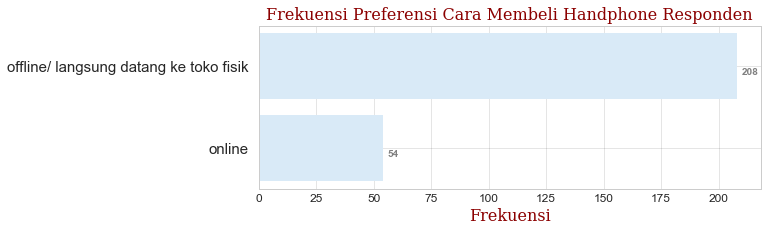

In [785]:
# mengambil data preferensi cara beli handphone
data25 = df.iloc[:,99:100]

# menghitung frekuensi setiap cara beli handphone responden
groupby_carabelihandphone = pd.DataFrame(data25.value_counts())
groupby_carabelihandphone.reset_index(inplace=True)
groupby_carabelihandphone.columns = ["Preferensi cara membeli handphone","Frekuensi"]

# mengubah data ke list
jenis_carabelihandphone = list(groupby_carabelihandphone["Preferensi cara membeli handphone"])
frek_carabelihandphone = list(groupby_carabelihandphone["Frekuensi"])

# membuat bar plot
fig6, ax6 = plt.subplots(figsize =(9, 3))
ax6.barh(jenis_carabelihandphone,frek_carabelihandphone,color = '#d9eaf7')
ax6.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax6.invert_yaxis()
plt.setp(ax6.get_xticklabels(),fontsize=12)
plt.setp(ax6.get_yticklabels(),fontsize=15)
ax6.xaxis.set_tick_params(pad = 5)
ax6.yaxis.set_tick_params(pad = 10)
ax6.xaxis.set_ticks_position('none')
ax6.yaxis.set_ticks_position('none')
for i in ax6.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax6.set_title('Frekuensi Preferensi Cara Membeli Handphone Responden',fontdict=font)
ax6.set_xlabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 26

In [786]:
# menghitung proporsi preferensi cara beli handphone
groupby_carabelihandphone_percentage = pd.DataFrame(data25.value_counts(normalize=True))
groupby_carabelihandphone = pd.DataFrame(data25.value_counts())
groupby_carabelihandphone.columns = ['Frekuensi']
groupby_carabelihandphone_percentage.columns = ['Proporsi (%)']

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_carabelihandphone_percentage.iloc[:,0])):
    groupby_carabelihandphone_percentage.iloc[:,0][i] = groupby_carabelihandphone_percentage.iloc[:,0][i] * 100
    
# menggabungkan data frekuensi dan proporsi preferensi cara beli handphone menjadi 1 tabel
nomor26 = [groupby_carabelihandphone,groupby_carabelihandphone_percentage]
nomor26 = pd.concat(nomor26,axis=1)
nomor26 = nomor26.rename_axis(None)
nomor26.rename_axis('Preferensi cara membeli handphone',axis='columns',inplace=True)
display(nomor26)

Preferensi cara membeli handphone,Frekuensi,Proporsi (%)
offline/ langsung datang ke toko fisik,208,79.389313
online,54,20.610687


### Nomor 27

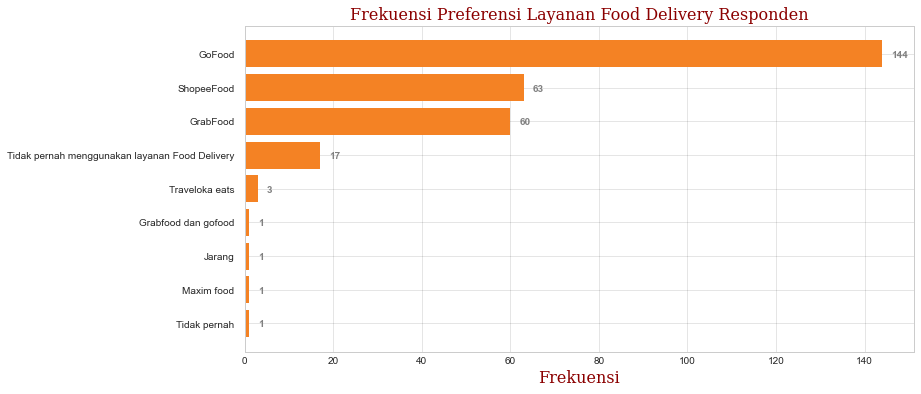

In [787]:
# mengambil data preferensi layanan makanan online
data27 = df.iloc[:,128:129]

# menghitung frekuensi setiap preferensi layanan makanan online responden
groupby_layananmakananonline = pd.DataFrame(data27.value_counts())
groupby_layananmakananonline.reset_index(inplace=True)
groupby_layananmakananonline.columns = ["Preferensi layanan food delivery","Frekuensi"]

# mengubah data ke list
jenis_layananmakananonline = list(groupby_layananmakananonline["Preferensi layanan food delivery"])
frek_layananmakananonline = list(groupby_layananmakananonline["Frekuensi"])

# membuat bar plot
fig7, ax7 = plt.subplots(figsize =(12, 6))
ax7.barh(jenis_layananmakananonline,frek_layananmakananonline,color = '#f48224')
ax7.grid(b = True, color ='black',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.2)
ax7.invert_yaxis()
plt.setp(ax6.get_xticklabels(),fontsize=12)
plt.setp(ax6.get_yticklabels(),fontsize=15)
ax7.xaxis.set_tick_params(pad = 5)
ax7.yaxis.set_tick_params(pad = 10)
ax7.xaxis.set_ticks_position('none')
ax7.yaxis.set_ticks_position('none')
for i in ax7.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax7.set_title('Frekuensi Preferensi Layanan Food Delivery Responden',fontdict=font)
ax7.set_xlabel('Frekuensi',fontdict=font)
plt.show()

### Nomor 28

In [788]:
# menghitung proporsi preferensi layanan makanan online
groupby_layananmakananonline_percentage = pd.DataFrame(data27.value_counts(normalize=True))
groupby_layananmakananonline = pd.DataFrame(data27.value_counts())
groupby_layananmakananonline.columns = ['Frekuensi']
groupby_layananmakananonline_percentage.columns = ['Proporsi (%)']

# mengubah proporsi dalam bentuk persentase untuk memudahkan pembacaan
for i in range(len(groupby_layananmakananonline_percentage.iloc[:,0])):
    groupby_layananmakananonline_percentage.iloc[:,0][i] = groupby_layananmakananonline_percentage.iloc[:,0][i] * 100
    
# menggabungkan data frekuensi dan proporsi preferensi layanan makanan online menjadi 1 tabel
nomor28 = [groupby_layananmakananonline,groupby_layananmakananonline_percentage]
nomor28 = pd.concat(nomor28,axis=1)
nomor28 = nomor28.rename_axis(None)
nomor28.rename_axis('Preferensi layanan makanan online',axis='columns',inplace=True)
display(nomor28)

Preferensi layanan makanan online,Frekuensi,Proporsi (%)
GoFood,144,49.484536
ShopeeFood,63,21.649485
GrabFood,60,20.618557
Tidak pernah menggunakan layanan Food Delivery,17,5.841924
Traveloka eats,3,1.030928
Grabfood dan gofood,1,0.343643
Jarang,1,0.343643
Maxim food,1,0.343643
Tidak pernah,1,0.343643


### Nomor 29

#### Menggabungkan data untuk ANOVA test

In [789]:
# mengambil data usia dan layanan food delivery yang digunakan
nomor29 = df.iloc[:,[1,128]]

# memfilter agar layanan food delivery hanya GrabFood, ShopeeFood, dan GoFood
nomor29 = nomor29.loc[nomor29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"].isin(["GrabFood","GoFood","ShopeeFood"])]

# mengurut berdasarkan layanan agar bisa memasukkan xbar per group
nomor29 = nomor29.sort_values(by=["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"])

# menghitung xbar semua group dan mengubah menjadi DataFrame
xbar_all = np.mean(nomor29["Usia"])
xbar_all = [xbar_all for i in range(len(nomor29))]
xbar_all = pd.DataFrame(xbar_all)
xbar_all.columns = ['Xbar All']

# mengambil data usia dengan layanan food delivery preferensi = GoFood
data_gofood = nomor29.loc[nomor29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"]=="GoFood"] 

# menghitung xbar GoFood dan mengubah menjadi DataFrame
xbar_gofood = np.mean(data_gofood["Usia"])
xbar_gofood = [xbar_gofood for i in range(len(data_gofood))]
xbar_gofood = pd.DataFrame(xbar_gofood)
xbar_gofood.columns = ['Xbar GoFood']

# mengambil data usia dengan layanan food delivery preferensi = GrabFood
data_grabfood = nomor29.loc[nomor29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"]=="GrabFood"] 

# menghitung xbar GrabFood dan mengubah menjadi DataFrame
xbar_grabfood = np.mean(data_grabfood["Usia"])
xbar_grabfood = [xbar_grabfood for i in range(len(data_grabfood))]
xbar_grabfood = pd.DataFrame(xbar_grabfood)
xbar_grabfood.columns = ['Xbar GoFood']

# mengambil data usia dengan layanan food delivery preferensi = ShopeeFood
data_shopeefood = nomor29.loc[nomor29["50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"]=="ShopeeFood"] 

# menghitung xbar ShopeeFood dan mengubah menjadi DataFrame
xbar_shopeefood = np.mean(data_shopeefood["Usia"])
xbar_shopeefood = [xbar_shopeefood for i in range(len(data_shopeefood))]
xbar_shopeefood = pd.DataFrame(xbar_shopeefood)
xbar_shopeefood.columns = ['Xbar GoFood']

# menggabungkan DataFrame xbar tiap group menjadi DataFrame xbar per group
xbar_per_group = [xbar_gofood,xbar_grabfood,xbar_shopeefood]
xbar_per_group = pd.concat(xbar_per_group)
xbar_per_group.columns = ['Xbar per group']

# menggabungkan data yang diperlukan
nomor29.reset_index(inplace=True,drop=True)
xbar_per_group.reset_index(inplace=True,drop=True)
nomor29 = pd.concat([nomor29,xbar_per_group,xbar_all],axis=1)

# menghitung data (x - xbar per group)^2 dan (x - xbar all)^2
x_min_xbar_per_group2 = []
x_min_xbar_all2 = []
for i in range(len(nomor29)):
    x_min_xbar_per_group2.append((nomor29.iloc[:,0][i] - nomor29.iloc[:,2][i])**2)
    x_min_xbar_all2.append((nomor29.iloc[:,0][i] - nomor29.iloc[:,3][i])**2)

# mengubah data (x - xbar per group)^2 dan (x - xbar all)^2 menjadi bentuk DataFrame
x_min_xbar_per_group2 = pd.DataFrame(x_min_xbar_per_group2)
x_min_xbar_all2 = pd.DataFrame(x_min_xbar_all2)
x_min_xbar_per_group2.columns = ['(X - Xbar per group) ^ 2']
x_min_xbar_all2.columns = ['(X - Xbar all) ^ 2']

# menggabungkan semua data yang diperlukan untuk one way ANOVA test
nomor29 = pd.concat([nomor29,x_min_xbar_per_group2,x_min_xbar_all2],axis=1)
display(nomor29)

,Usia,"50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?",Xbar per group,Xbar All,(X - Xbar per group) ^ 2,(X - Xbar all) ^ 2
0,19,GoFood,29.194444,27.756554,103.926698,76.677243
1,19,GoFood,29.194444,27.756554,103.926698,76.677243
2,17,GoFood,29.194444,27.756554,148.704475,115.703461
3,51,GoFood,29.194444,27.756554,475.482253,540.257768
4,19,GoFood,29.194444,27.756554,103.926698,76.677243
...,...,...,...,...,...,...
262,19,ShopeeFood,22.698413,27.756554,13.678256,76.677243
263,44,ShopeeFood,22.698413,27.756554,453.757622,263.849528
264,19,ShopeeFood,22.698413,27.756554,13.678256,76.677243
265,46,ShopeeFood,22.698413,27.756554,542.963971,332.823311


#### perhitungan tabel ANOVA

In [790]:
# data yang diperlukan untuk tabel one way ANOVA test
alpha = 0.05
dfb = 2
dft = len(nomor29) - 1
dfe = dft - dfb
sse = nomor29["(X - Xbar per group) ^ 2"].sum()
sst = nomor29["(X - Xbar all) ^ 2"].sum()
ssb = sst - sse
msb = ssb / dfb
mse = sse / dfe
f = msb / mse

# membuat tabel anova ( template dan hasil akhir )
# template
print("Template tabel one way ANOVA test :")
data_anova_template = [["DFB","SSB","MSB","MSB / MSE"], ["DFE","SSE","MSE"], ["DFT","SST"]]
tabel_anova_template = pd.DataFrame(data_anova_template, columns=['DF','SS','MS','f'])
tabel_anova_template = tabel_anova_template.fillna("-")
display(tabel_anova_template)

# hasil akhir
print("\nHasil akhir one way ANOVA test :")
data_anova = [[dfb,ssb,msb,f], [dfe,sse,mse], [dft,sst]]
tabel_anova = pd.DataFrame(data_anova, columns=['DF','SS','MS','f'])
tabel_anova = tabel_anova.fillna("-")
display(tabel_anova)

# nilai falpha dan kesimpulan uji
f_alpha = stats.f.ppf(1-alpha, dfb, dfe)
print(f"Nilai f alpha : {f_alpha:.5f}")
print(f"Nilai f : {f:.5f}")
print(f"Critical region -> f > {f_alpha:.5f} (f di dalam critical region)")
print("H0 berhasil ditolak")

# nilai p value
p_value = 1 - stats.f.cdf(f,dfb,dfe)
print(f"P-value : {p_value:.5f}")

Template tabel one way ANOVA test :


,DF,SS,MS,f
0,DFB,SSB,MSB,MSB / MSE
1,DFE,SSE,MSE,-
2,DFT,SST,-,-



Hasil akhir one way ANOVA test :


,DF,SS,MS,f
0,2,2117.16730,1058.58365,6.628701
1,264,42160.00873,159.697003,-
2,266,44277.17603,-,-


Nilai f alpha : 3.02998
Nilai f : 6.62870
Critical region -> f > 3.02998 (f di dalam critical region)
H0 berhasil ditolak
P-value : 0.00155


### Nomor 30

#### Insights / pelajaran yang bisa diambil :
1. Jumlah Pengguna bank BCA lebih banyak secara signifikan dibandingkan dengan jumlah pengguna bank lainnya.
2. Mayoritas responden lebih senang melakukan transfer antar bank melalui *mobile banking*.
3. Mayoritas responden berada di usia 20-an dan merupakan pelajar / mahasiswa.
4. Mayoritas responden lebih senang menggunakan GoPay, ShopeePay, dan OVO secara respektif
5. Mayoritas responden mengisi ulang E-money mereka sebesar Rp50.000 - Rp100.000 dalam sekali isi ulang.
6. E-commerce yang sering dipakai oleh mayoritas responden adalah Shopee.
7. Mayoritas responden lebih memilih beli *handphone* secara langsung di toko fisik / offline.
8. Layanan food delivery yang jauh lebih disenangi berdasarkan data responden adalah GoFood.